La estructura del árbol:

* XGBoost produce árboles más simétricos y balanceados.

* LightGBM produce árboles más profundos y desbalanceados si no se controla.

La precisión y riesgo de overfitting:

* Leaf-wise (LightGBM) puede encontrar mejores divisiones, pero se sobreajusta más fácil.

* Level-wise (XGBoost) es más estable, pero a veces menos preciso.

In [24]:
df = pd.get_dummies(df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 12
[LightGBM] [Info] Start training from score 206923.960894


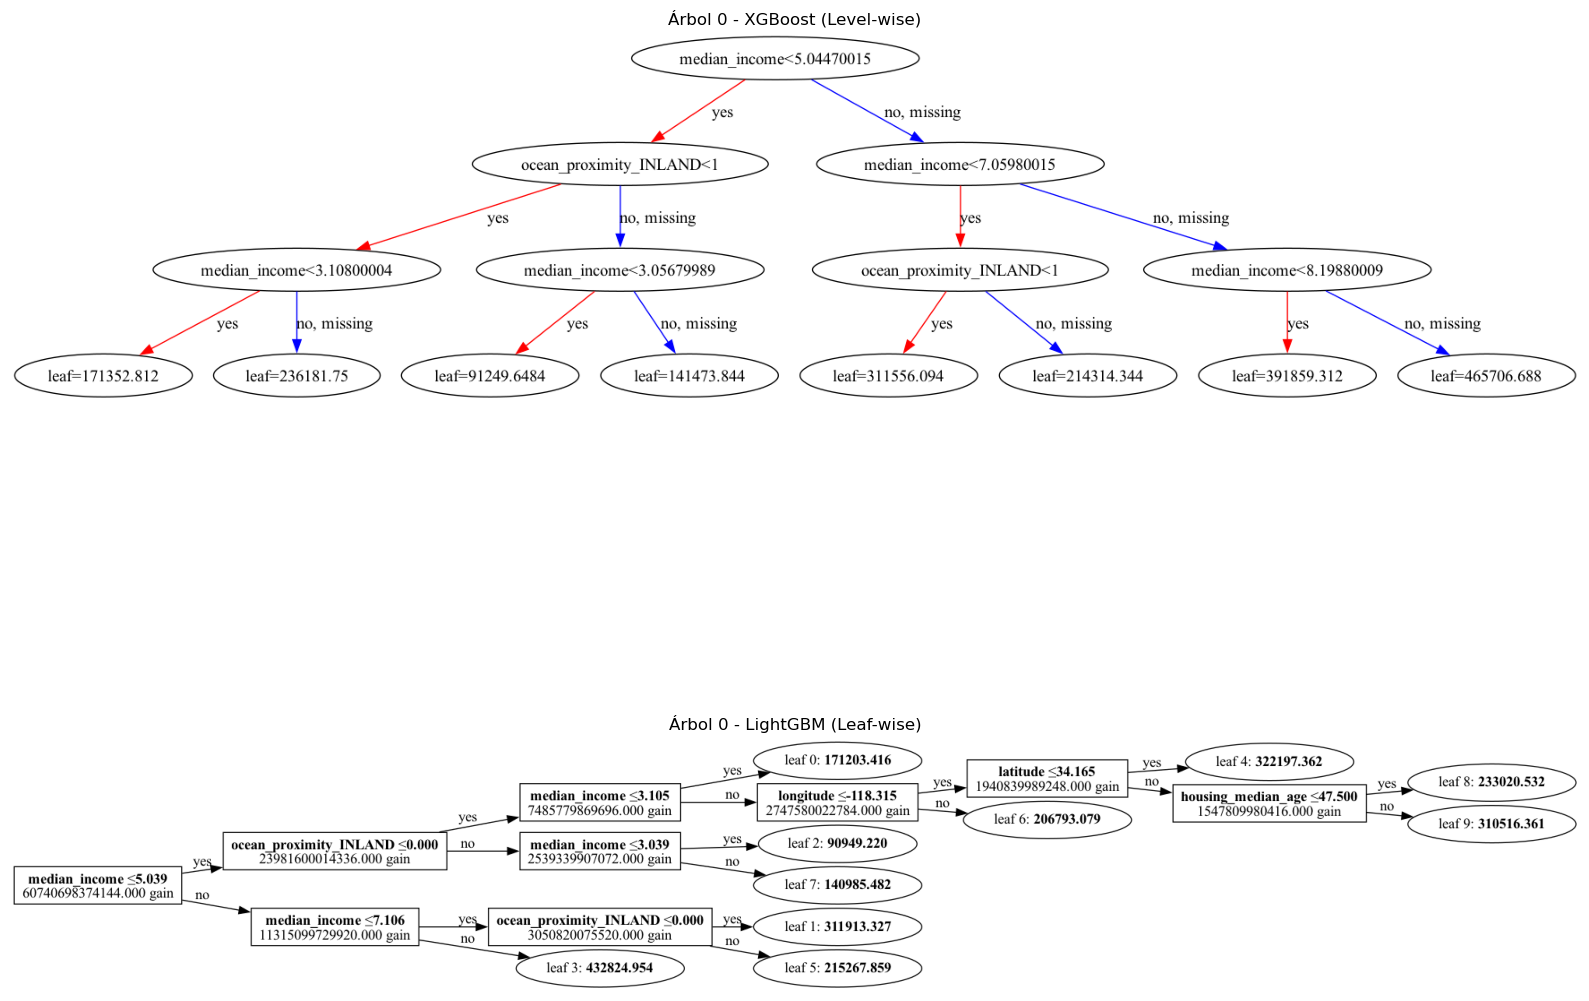

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb

# Cargar dataset de housing (California)
df = pd.read_csv('housing.csv')
df = pd.get_dummies(df)  # codifica variables categóricas
target = 'median_house_value'
# Eliminar caracteres conflictivos de nombres de columnas
df.columns = df.columns.str.replace(r'[\[\]<>]', '_', regex=True)

# Separar variables y target
X = df.drop(target, axis=1)
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Asegurar que todos los features sean float (por si hay bools o ints mezclados)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=1,
    tree_method='hist',
    learning_rate=1.0,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=1,
    num_leaves=10,
    learning_rate=1.0,
    max_depth=-1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Visualizar los árboles
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

# XGBoost
xgb.plot_tree(xgb_model, num_trees=0, ax=axs[0])
axs[0].set_title("Árbol 0 - XGBoost (Level-wise)")

# LightGBM
lgb.plot_tree(lgb_model.booster_, tree_index=0, show_info=['split_gain'], ax=axs[1])
axs[1].set_title("Árbol 0 - LightGBM (Leaf-wise)")

plt.tight_layout()
plt.show()


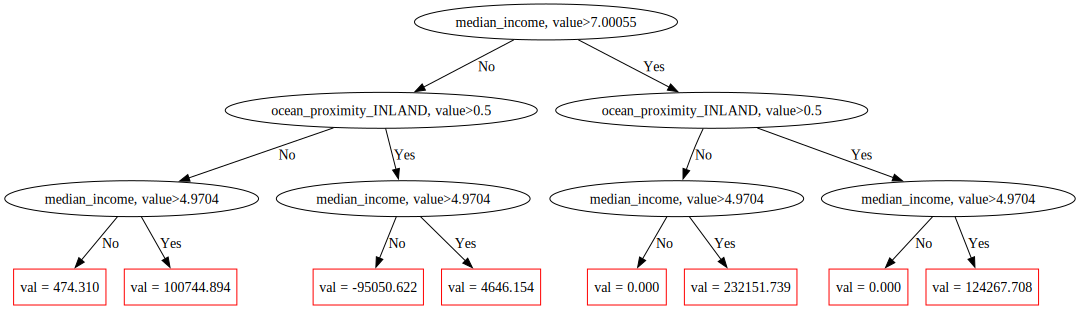

In [33]:
from catboost import CatBoostRegressor, Pool

# Entrenar modelo regresor
model = CatBoostRegressor(
    iterations=10,
    depth=3,
    learning_rate=1.0,
    verbose=0,
    random_seed=42
)
model.fit(X_train, y_train)

# Visualizar el primer árbol (solo en notebooks)
model.plot_tree(tree_idx=0, pool=Pool(X_train, y_train))
